In [49]:
import os
import re
import uproot
import numpy as np
import matplotlib.pyplot as plt

### Merging

In [53]:
fname  = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/CProfiles/cprofiles_merged.root")
f  = uproot.open(fname)
f.classnames()

# get momentum values
momenta = np.sort([float(re.findall(r'\d+(?:\.\d+)?', key)[0]) for key in f.keys() if re.match("g_\d+", key)])

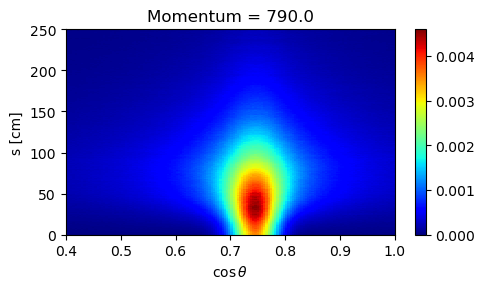

In [44]:
# choose random momentum
momentum = np.random.choice(momenta)
H, thbins, sbins  =  f[f"g_{momentum}"].to_numpy()

plt.figure(figsize=[5, 3])

plt.title(f"Momentum = {momentum}")
plt.pcolormesh(thbins, sbins/10, H.T, cmap="jet")
plt.xlim([0.4, None])
plt.ylim([None, 250])
plt.xlabel(r"$\cos \theta$")
plt.ylabel("s [cm]")
plt.colorbar()

plt.tight_layout()

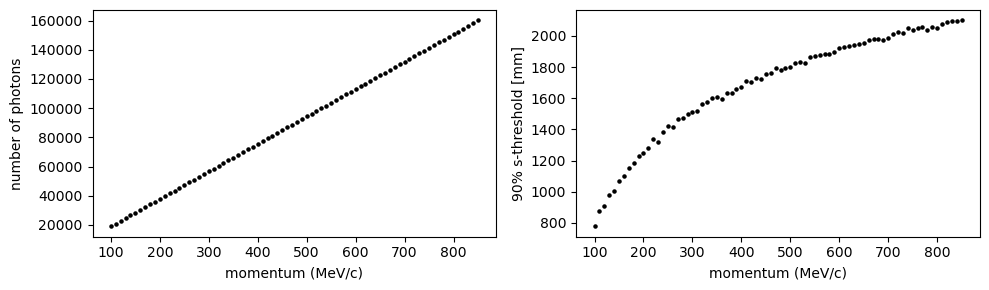

In [46]:
mom, nphotons    = f["gNphot"] .values()
mom, sthresholds = f["gsthr"]  .values()

plt.figure(figsize=[10, 3])

# nphotons
plt.subplot(121)
plt.scatter(mom, nphotons, s=5, c="k")
plt.xlabel("momentum (MeV/c)")
plt.ylabel("number of photons")

#sthreshols
plt.subplot(122)
plt.scatter(mom, sthresholds, s=5, c="k")
plt.xlabel("momentum (MeV/c)")
plt.ylabel("90% s-threshold [mm]")

plt.tight_layout()